### Import data from CSV (for demonstration purposes)

In [1]:
import pandas as pd
training_data = pd.read_csv('training_data.csv', index_col=0)

"""
'training_data.csv' is simply my DataFrame from another jupyter notebook that I 
feature-engineered and exported to a csv (i.e. DataFrame.to_csv()).
You can use your own data to play around with this code.
"""

training_data['TimeStamp'] = pd.to_datetime(training_data['TimeStamp']).dt.round('1min')

"""
Note that if you read from a csv file, however, you will need to convert the TimeStamps back to datetimes in Pandas.
Otherwise they will be interpreted as strings.

"""
training_data.tail()

,TimeStamp,bitcoin Price,ethereum Price,ripple Price,bitcoin-cash Price,eos Price,stellar Price,litecoin Price,reddit_average_posts_48h,reddit_average_comments_48h,...,reddit_average_comments_48h - 1d,reddit_average_comments_48h - 2d,facebook_likes - 1d,facebook_likes - 2d,twitter_followers - 1d,twitter_followers - 2d,fb_likes_diff - 1d,fb_likes_diff - 2d,tw_followers_diff - 1d,tw_followers_diff - 2d
145,2019-01-21,3539.167531,0.159643,0.167042,0.078926,0.121273,0.043288,0.169159,0.366638,0.196529,...,0.169684,0.266722,0.990854,0.987805,0.336957,0.341033,0.221827,0.221395,0.159634,0.169480
146,2019-01-22,3531.004183,0.151236,0.170386,0.077927,0.121264,0.039184,0.175300,0.348393,0.262750,...,0.196529,0.169684,0.993902,0.990854,0.330163,0.336957,0.221827,0.221827,0.155415,0.159634
147,2019-01-23,3571.266908,0.160631,0.169410,0.087636,0.141441,0.039254,0.187557,0.458732,0.292387,...,0.262750,0.196529,0.996951,0.993902,0.324275,0.330163,0.221827,0.221827,0.156821,0.155415
148,2019-01-24,3555.700003,0.154017,0.160654,0.095106,0.138589,0.033152,0.193232,0.475239,0.185791,...,0.292387,0.262750,1.000000,0.996951,0.304801,0.324275,0.221827,0.221827,0.135724,0.156821
149,2019-01-25,3565.642005,0.153212,0.163239,0.089526,0.141441,0.033627,0.211475,0.583840,0.168211,...,0.185791,0.292387,1.000000,1.000000,0.295743,0.304801,0.214046,0.221827,0.151899,0.135724


### Create "future" data set
- add 2 more rows for the future days
- populate future data with the -2day offset features from the previous 2 days

#### In order to do this, we first need to create 2 dummy rows that we can attach onto our training data.

In [2]:
import numpy as np
dummy_rows = pd.DataFrame(np.zeros(shape=(2,len(training_data.columns))),
                          columns=training_data.columns)

dummy_rows

,TimeStamp,bitcoin Price,ethereum Price,ripple Price,bitcoin-cash Price,eos Price,stellar Price,litecoin Price,reddit_average_posts_48h,reddit_average_comments_48h,...,reddit_average_comments_48h - 1d,reddit_average_comments_48h - 2d,facebook_likes - 1d,facebook_likes - 2d,twitter_followers - 1d,twitter_followers - 2d,fb_likes_diff - 1d,fb_likes_diff - 2d,tw_followers_diff - 1d,tw_followers_diff - 2d
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Concatenate our known data with our dummy data.

In [3]:
training_and_future = pd.concat([training_data, dummy_rows])
training_and_future.tail(5)

,TimeStamp,bitcoin Price,ethereum Price,ripple Price,bitcoin-cash Price,eos Price,stellar Price,litecoin Price,reddit_average_posts_48h,reddit_average_comments_48h,...,reddit_average_comments_48h - 1d,reddit_average_comments_48h - 2d,facebook_likes - 1d,facebook_likes - 2d,twitter_followers - 1d,twitter_followers - 2d,fb_likes_diff - 1d,fb_likes_diff - 2d,tw_followers_diff - 1d,tw_followers_diff - 2d
147,2019-01-23 00:00:00,3571.266908,0.160631,0.169410,0.087636,0.141441,0.039254,0.187557,0.458732,0.292387,...,0.262750,0.196529,0.996951,0.993902,0.324275,0.330163,0.221827,0.221827,0.156821,0.155415
148,2019-01-24 00:00:00,3555.700003,0.154017,0.160654,0.095106,0.138589,0.033152,0.193232,0.475239,0.185791,...,0.292387,0.262750,1.000000,0.996951,0.304801,0.324275,0.221827,0.221827,0.135724,0.156821
149,2019-01-25 00:00:00,3565.642005,0.153212,0.163239,0.089526,0.141441,0.033627,0.211475,0.583840,0.168211,...,0.185791,0.292387,1.000000,1.000000,0.295743,0.304801,0.214046,0.221827,0.151899,0.135724
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Let's inspect our new TimeStamps

In [4]:
timestamps = training_and_future['TimeStamp'].values

list(timestamps[-10:]) #show the last 10

[Timestamp('2019-01-18 00:00:00'),
 Timestamp('2019-01-19 00:00:00'),
 Timestamp('2019-01-20 00:00:00'),
 Timestamp('2019-01-21 00:00:00'),
 Timestamp('2019-01-22 00:00:00'),
 Timestamp('2019-01-23 00:00:00'),
 Timestamp('2019-01-24 00:00:00'),
 Timestamp('2019-01-25 00:00:00'),
 0.0,
 0.0]

### Now let's convert our new values to their proper form.
- **Convert them to Pandas DateTime values, and offset them accordingly.**

In [5]:
#How to access the last available timeset we have? (i.e. the present day)

presentDay = timestamps[-3]
presentDay

Timestamp('2019-01-25 00:00:00')

#### Re-label our new future dates.
- In this case, we'd like to make predictions for BTC at 6pm, 1 and 2 days into the future. Of course, if we want data on an hourly level, the data would needed to have been sampled on an hourly level beforehand (which is not the case here), but this is meant to demonstrate how this could be done using `pd.DateOffset()`.

In [6]:
training_and_future.iat[-2, 0] = presentDay + pd.DateOffset(days=1, minutes=1080)
training_and_future.iat[-1, 0] = presentDay + pd.DateOffset(days=2, minutes=1080)

training_and_future.tail(5)

,TimeStamp,bitcoin Price,ethereum Price,ripple Price,bitcoin-cash Price,eos Price,stellar Price,litecoin Price,reddit_average_posts_48h,reddit_average_comments_48h,...,reddit_average_comments_48h - 1d,reddit_average_comments_48h - 2d,facebook_likes - 1d,facebook_likes - 2d,twitter_followers - 1d,twitter_followers - 2d,fb_likes_diff - 1d,fb_likes_diff - 2d,tw_followers_diff - 1d,tw_followers_diff - 2d
147,2019-01-23 00:00:00,3571.266908,0.160631,0.169410,0.087636,0.141441,0.039254,0.187557,0.458732,0.292387,...,0.262750,0.196529,0.996951,0.993902,0.324275,0.330163,0.221827,0.221827,0.156821,0.155415
148,2019-01-24 00:00:00,3555.700003,0.154017,0.160654,0.095106,0.138589,0.033152,0.193232,0.475239,0.185791,...,0.292387,0.262750,1.000000,0.996951,0.304801,0.324275,0.221827,0.221827,0.135724,0.156821
149,2019-01-25 00:00:00,3565.642005,0.153212,0.163239,0.089526,0.141441,0.033627,0.211475,0.583840,0.168211,...,0.185791,0.292387,1.000000,1.000000,0.295743,0.304801,0.214046,0.221827,0.151899,0.135724
0,2019-01-26 18:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2019-01-27 18:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Now let's shift our columns into the "future."
- The features we need to shift into the future are the CURRENT day values.
- The features that we will model are the values from 2 DAYS IN THE PAST.

In [7]:
features_to_shift = [
                     'bitcoin Price', 
                     'ethereum Price', 
                     'ripple Price',
                     'bitcoin-cash Price', 
                     'eos Price', 
                     'stellar Price', 
                     'litecoin Price',
                     'reddit_average_posts_48h', 
                     'reddit_average_comments_48h',
                     'facebook_likes', 
                     'twitter_followers', 
                     'fb_likes_diff',
                     'tw_followers_diff'
                    ]

features_to_model = [
                    'TimeStamp',     ### WE WILL LIKELY NOT USE THIS AS A FEATURE, ACTUALLY.
                    'bitcoin Price', ### THIS WILL BE OUR TARGET.
                    'bitcoin Price - 2d',
                    'ethereum Price - 2d', 
                    'ripple Price - 2d', 
                    'bitcoin-cash Price - 2d', 
                    'eos Price - 2d', 
                    'stellar Price - 2d', 
                    'litecoin Price - 2d', 
                    'reddit_average_posts_48h - 2d', 
                    'reddit_average_comments_48h - 2d',
                    'facebook_likes - 2d', 
                    'twitter_followers - 2d',  
                    'fb_likes_diff - 2d',
                    'tw_followers_diff - 2d'
                    ]

### Here's where the magic happens.
- Note that the bitcoin prices for the future are still set to our dummy values (zero).
- This makes sense, because of course we don't know what they are yet (still to be predicted).

In [8]:
for i in features_to_shift:
    training_and_future.at[0, '{} - 2d'.format(i)] = training_and_future.at[148, i]
    training_and_future.at[1, '{} - 2d'.format(i)] = training_and_future.at[149, i]

training_and_future[features_to_model].tail(5)

,TimeStamp,bitcoin Price,bitcoin Price - 2d,ethereum Price - 2d,ripple Price - 2d,bitcoin-cash Price - 2d,eos Price - 2d,stellar Price - 2d,litecoin Price - 2d,reddit_average_posts_48h - 2d,reddit_average_comments_48h - 2d,facebook_likes - 2d,twitter_followers - 2d,fb_likes_diff - 2d,tw_followers_diff - 2d
147,2019-01-23 00:00:00,3571.266908,3539.167531,0.159643,0.167042,0.078926,0.121273,0.043288,0.169159,0.366638,0.196529,0.993902,0.330163,0.221827,0.155415
148,2019-01-24 00:00:00,3555.700003,3531.004183,0.151236,0.170386,0.077927,0.121264,0.039184,0.175300,0.348393,0.262750,0.996951,0.324275,0.221827,0.156821
149,2019-01-25 00:00:00,3565.642005,3571.266908,0.160631,0.169410,0.087636,0.141441,0.039254,0.187557,0.458732,0.292387,1.000000,0.304801,0.221827,0.135724
0,2019-01-26 18:00:00,0.000000,3555.700003,0.154017,0.160654,0.095106,0.138589,0.033152,0.193232,0.475239,0.185791,1.000000,0.295743,0.214046,0.151899
1,2019-01-27 18:00:00,0.000000,3565.642005,0.153212,0.163239,0.089526,0.141441,0.033627,0.211475,0.583840,0.168211,1.000000,0.295743,0.214046,0.165963


### Now that we've filled our future day with the model parameters we want (i.e. values from 2 days ago), we can separate them from the rest of the dataframe and call it `testing_data`.

In [9]:
testing_data = training_and_future.iloc[-2:][features_to_model]
testing_data

,TimeStamp,bitcoin Price,bitcoin Price - 2d,ethereum Price - 2d,ripple Price - 2d,bitcoin-cash Price - 2d,eos Price - 2d,stellar Price - 2d,litecoin Price - 2d,reddit_average_posts_48h - 2d,reddit_average_comments_48h - 2d,facebook_likes - 2d,twitter_followers - 2d,fb_likes_diff - 2d,tw_followers_diff - 2d
0,2019-01-26 18:00:00,0.0,3555.700003,0.154017,0.160654,0.095106,0.138589,0.033152,0.193232,0.475239,0.185791,1.0,0.295743,0.214046,0.151899
1,2019-01-27 18:00:00,0.0,3565.642005,0.153212,0.163239,0.089526,0.141441,0.033627,0.211475,0.583840,0.168211,1.0,0.295743,0.214046,0.165963


### Instantiate linear regression model and fit it on training data.

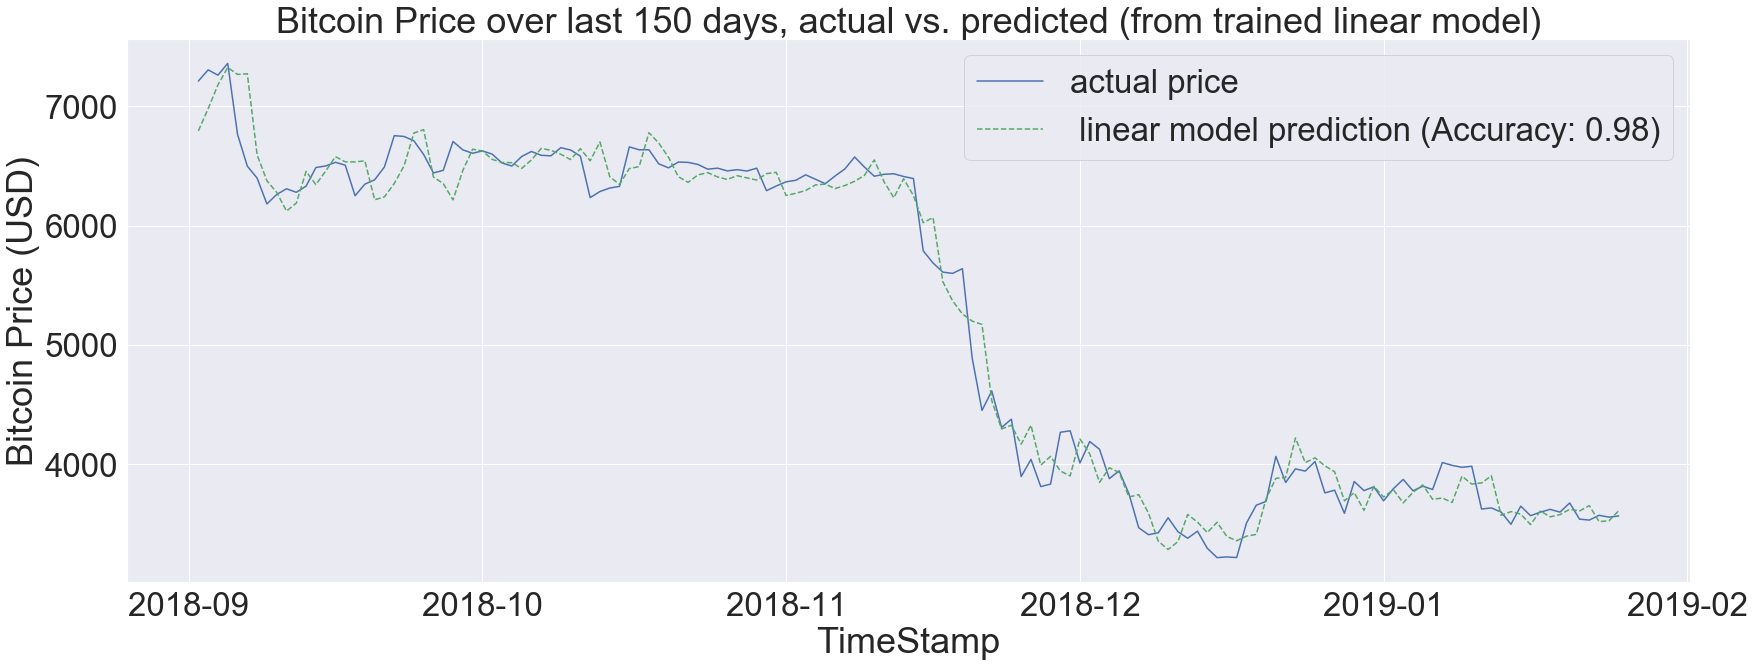

In [10]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=3)
%matplotlib inline

X_train = np.array(training_data[features_to_model[2:]]) #DON'T WANT TO INCLUDE TIMESTAMP OR BITCOIN PRICE (TARGET)
y_train = np.array(training_data[['bitcoin Price']])

m_linear = LinearRegression()
m_linear.fit(X_train, y_train)
score_linear = m_linear.score(X_train, y_train)
y_pred = m_linear.predict(X_train)

X_axis = training_data['TimeStamp']
plt.figure(figsize = (28,10))
plt.plot(X_axis, y_train, label='actual price')
plt.plot(X_axis, y_pred, 'g--', label=' linear model prediction (Accuracy: {})'.format(round(score_linear, 3)))
plt.title('Bitcoin Price over last 150 days, actual vs. predicted (from trained linear model)')
plt.xlabel('TimeStamp')
plt.ylabel('Bitcoin Price (USD)')
plt.legend(loc='upper right')

### Of course, it's not a very good model, since the data is difficult to predict, and it seems to simply correlate it's prediction with the prices from 2 days ago.
- But that's a different story...

In [11]:
m_linear.coef_

array([[ 9.38220589e-01, -1.33713153e+03,  3.26689119e+02,
         5.49243300e+02,  2.21106169e+03, -1.78786689e+03,
        -3.50402561e+01,  7.19784811e+01, -3.09943018e+01,
        -1.70287715e+02,  1.08335240e+02,  2.32556274e+02,
        -2.66229622e+02]])

### Apply trained linear model on the testing data set to get predicted BTC prices for next 2 days.

In [12]:
testing_array = np.array(testing_data[features_to_model[2:]])
btc_prediction = m_linear.predict(testing_array)
btc_prediction

array([[3606.47982832],
       [3624.09749812]])

### And if we want to make this nicer to look at, we can put it back into a dataframe.

In [13]:
testing_data_prediction = testing_data.copy()
testing_data_prediction['bitcoin Price'] = btc_prediction
testing_data_prediction

,TimeStamp,bitcoin Price,bitcoin Price - 2d,ethereum Price - 2d,ripple Price - 2d,bitcoin-cash Price - 2d,eos Price - 2d,stellar Price - 2d,litecoin Price - 2d,reddit_average_posts_48h - 2d,reddit_average_comments_48h - 2d,facebook_likes - 2d,twitter_followers - 2d,fb_likes_diff - 2d,tw_followers_diff - 2d
0,2019-01-26 18:00:00,3606.479828,3555.700003,0.154017,0.160654,0.095106,0.138589,0.033152,0.193232,0.475239,0.185791,1.0,0.295743,0.214046,0.151899
1,2019-01-27 18:00:00,3624.097498,3565.642005,0.153212,0.163239,0.089526,0.141441,0.033627,0.211475,0.583840,0.168211,1.0,0.295743,0.214046,0.165963
